# Introduction to Time Series with Pandas

Most of our data will have a datatime index, so let's learn how to deal with this sort of data with pandas!

## Python Datetime Review
In the course introduction section we discussed Python datetime objects.

In [9]:
## import datetime
from datetime import datetime

In [10]:
# To illustrate the order of arguments
my_year = 2022
my_month = 5
my_day = 22
my_hour = 16
my_minute = 10
my_second = 15

In [11]:
# May 22th, 2022
my_date = datetime(my_year,my_month,my_day)

In [12]:
# Defaults to 0:00
my_date 

datetime.datetime(2022, 5, 22, 0, 0)

In [13]:
# May 22th, 2022 at 16:10:15
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

In [14]:
my_date_time

datetime.datetime(2022, 5, 22, 16, 10, 15)

You can grab any part of the datetime object you want

In [15]:
my_date.day

22

In [16]:
my_date_time.hour

16

## NumPy Datetime Arrays
We mentioned that NumPy handles dates more efficiently than Python's datetime format.<br>
The NumPy data type is called <em>datetime64</em> to distinguish it from Python's datetime.

In this section we'll show how to set up datetime arrays in NumPy. These will become useful later on in the course.<br>
For more info on NumPy visit https://docs.scipy.org/doc/numpy-1.15.4/reference/arrays.datetime.html

In [17]:
import numpy as np

In [19]:
## CREATE AN ARRAY FROM THREE DATES
## dtype='datetime64' (Numpy recognise it is datetime object)
np.array(['2022-03-15', '2022-04-24', '2022-05-09'], dtype='datetime64')

array(['2022-03-15', '2022-04-24', '2022-05-09'], dtype='datetime64[D]')

<div class="alert alert-info"><strong>NOTE:</strong> We see the dtype listed as <tt>'datetime64[D]'</tt>. This tells us that NumPy applied a day-level date precision.<br>
    If we want we can pass in a different measurement, such as <TT>[h]</TT> for hour or <TT>[Y]</TT> for year.</div>

In [20]:
np.array(['2022-03-15', '2022-04-24', '2022-05-09'], dtype='datetime64[h]')

array(['2022-03-15T00', '2022-04-24T00', '2022-05-09T00'],
      dtype='datetime64[h]')

In [21]:
np.array(['2022-03-15', '2022-04-24', '2022-05-09'], dtype='datetime64[Y]')

array(['2022', '2022', '2022'], dtype='datetime64[Y]')

## NumPy Date Ranges
Just as <tt>np.arange(start,stop,step)</tt> can be used to produce an array of evenly-spaced integers, we can pass a <tt>dtype</tt> argument to obtain an array of dates. Remember that the stop date is <em>exclusive</em>.

In [23]:
## AN ARRAY OF DATES FROM 5/1/22 TO 5/22/22 SPACED ONE WEEK APART
np.arange('2022-05-01', '2022-05-22', 7 , dtype='datetime64[D]')

array(['2022-05-01', '2022-05-08', '2022-05-15'], dtype='datetime64[D]')

By omitting the step value we can obtain every value based on the precision.

In [24]:
## AN ARRAY OF DATES FOR EVERY YEAR FROM 2000 TO 2022
np.arange('2000', '2022', dtype='datetime64[Y]')

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='datetime64[Y]')

## Pandas Datetime Index

We'll usually deal with time series as a datetime index when working with pandas dataframes. Fortunately pandas has a lot of functions and methods to work with time series!<br>
For more on the pandas DatetimeIndex visit https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [30]:
import pandas as pd

The simplest way to build a DatetimeIndex is with the <tt><strong>pd.date_range()</strong></tt> method:

In [34]:
## THE WEEK OF May 22TH, 2022
## ns is for nano second
idx = pd.date_range('5/22/2022', periods=7, freq='D')
idx

DatetimeIndex(['2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27', '2022-05-28'],
              dtype='datetime64[ns]', freq='D')

<div class="alert alert-info"><strong>DatetimeIndex Frequencies:</strong> When we used <tt>pd.date_range()</tt> above, we had to pass in a frequency parameter <tt>'D'</tt>. This created a series of 7 dates spaced one day apart. We'll cover this topic in depth in upcoming lectures, but for now, a list of time series offset aliases like <tt>'D'</tt> can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.</div>

Another way is to convert incoming text with the <tt><strong>pd.to_datetime()</strong></tt> method:

In [35]:
## 2nd method
idx = pd.date_range('May 22, 2022', periods=7, freq='D')
idx

DatetimeIndex(['2022-05-22', '2022-05-23', '2022-05-24', '2022-05-25',
               '2022-05-26', '2022-05-27', '2022-05-28'],
              dtype='datetime64[ns]', freq='D')

In [37]:
idx = pd.to_datetime(['May 22, 2022','1/2/18','03-Jan-2018',None])
idx
## NaT(Not a Time)

DatetimeIndex(['2022-05-22', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

A third way is to pass a list or an array of datetime objects into the <tt><strong>pd.DatetimeIndex()</strong></tt> method:

In [39]:
## Create a NumPy datetime array
## another format YY-MM-DD
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
some_dates

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [42]:
## Convert to an index
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

Notice that even though the dates came into pandas with a day-level precision, pandas assigns a nanosecond-level precision with the expectation that we might want this later on.

To set an existing column as the index, use <tt>.set_index()</tt><br>
><tt>df.set_index('Date',inplace=True)</tt>

## Pandas Datetime Analysis

In [44]:
## Create some random data
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[ 2.26723858  1.25136423]
 [-0.8547159  -1.54340112]
 [ 1.59144944  0.43290805]]


In [46]:
## Create a DataFrame with our random data, our date index, and our columns
df = pd.DataFrame(data,idx,cols)
df

,A,B
2016-03-15,2.267239,1.251364
2017-05-24,-0.854716,-1.543401
2018-08-09,1.591449,0.432908


In [57]:
## 2nd method for creating dataframe
idx= pd.date_range('2022-05-20', periods=3, freq= 'D')
df= pd.DataFrame(data, index= idx, columns= cols)

In [58]:
df

,A,B
2022-05-20,2.267239,1.251364
2022-05-21,-0.854716,-1.543401
2022-05-22,1.591449,0.432908


Now we can perform a typical analysis of our DataFrame

In [59]:
## index
df.index

DatetimeIndex(['2022-05-20', '2022-05-21', '2022-05-22'], dtype='datetime64[ns]', freq='D')

In [60]:
## Latest Date Value
df.index.max()

Timestamp('2022-05-22 00:00:00', freq='D')

In [61]:
## Latest Date Index Location
df.index.argmax()

2

In [63]:
## Earliest Date Value
df.index.min()

Timestamp('2022-05-20 00:00:00', freq='D')

In [64]:
## Earliest Date Index Location
df.index.argmin()

0

<div class="alert alert-info"><strong>NOTE:</strong> Normally we would find index locations by running <tt>.idxmin()</tt> or <tt>.idxmax()</tt> on <tt>df['column']</tt> since <tt>.argmin()</tt> and <tt>.argmax()</tt> have been deprecated. However, we still use <tt>.argmin()</tt> and <tt>.argmax()</tt> on the index itself.</div>

# Time Resampling

Let's learn how to sample time series data! This will be useful later on in the course!

In [71]:
import pandas as pd
%matplotlib inline

## Import the data
For this exercise we'll look at Starbucks stock data from 2015 to 2018 which includes daily closing prices and trading volumes.

In [77]:
## read the data
## parse_dates --> to convert dtype object to datetime
df = pd.read_csv('Course Data/starbucks.csv', index_col='Date', parse_dates=True)

Note: the above code is a faster way of doing the following:
<pre>df = pd.read_csv('Course Data/starbucks.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)</pre>

In [78]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB


In [80]:
## Dtype= datetime due to parse_date
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

## resample()

A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method. [[reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)]

In [81]:
## Our index
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [83]:
## 'A' stand for year and freq (Yearly Means)
df.resample(rule='A')

In [84]:
## how you want to resample (mean)
## 'A' stand for year and freq (Yearly Means)
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function (in this case we calculate the mean), and reports the result as the last day of that year.

### Custom Resampling Functions

We're not limited to pandas built-in summary functions (min/max/mean etc.). We can define our own function:

In [107]:
## we can also resample the time by creating custom function
def first_day(entry):
    """
    Returns the first instance of the period, regardless of sampling rate.
    """
    if len(entry):  # handles the case of missing data
        return entry[0]

In [108]:
## rule'A' code for year (See Table)
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [109]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


### Plotting

In [110]:
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [111]:
df['Close'].resample('A').mean()

Date
2015-12-31    50.078100
2016-12-31    53.891732
2017-12-31    55.457310
2018-12-31    56.870005
Freq: A-DEC, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

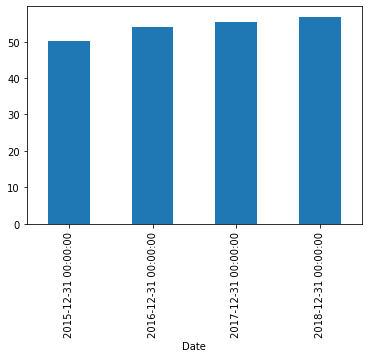

In [112]:
df['Close'].resample('A').mean().plot.bar()

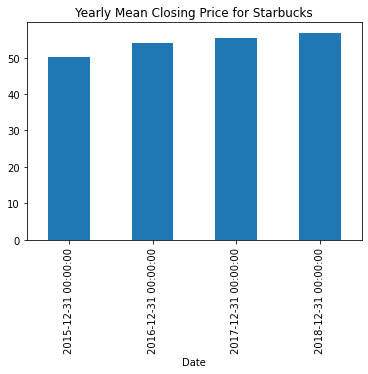

In [113]:
## title
df['Close'].resample('A').mean().plot.bar(title='Yearly Mean Closing Price for Starbucks');

Pandas treats each sample as its own trace, and by default assigns different colors to each one. If you want, you can pass a <strong>color</strong> argument to assign your own color collection, or to set a uniform color. For example, <tt>color='#1f77b4'</tt> sets a uniform "steel blue" color.

Also, the above code can be broken into two lines for improved readability.

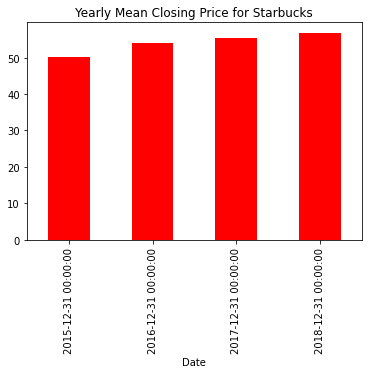

In [116]:
## changing the  color of the plot
## passing a color ---> code
title = 'Yearly Mean Closing Price for Starbucks'
df['Close'].resample('A').mean().plot.bar(title=title,color=['red']);

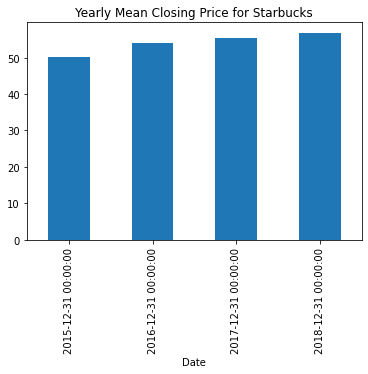

In [118]:
## changing the  color of the plot
## passing a color ---> code
title = 'Yearly Mean Closing Price for Starbucks'
df['Close'].resample('A').mean().plot.bar(title=title,color=['#1f77b6']);

Visit on this link, and get multiple codes for different colors
https://encycolorpedia.com/1f77b6

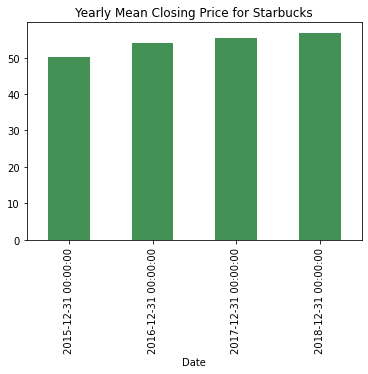

In [122]:
## changing the  color of the plot
## passing a color ---> code
title = 'Yearly Mean Closing Price for Starbucks'
df['Close'].resample('A').mean().plot.bar(title=title,color=['#449155']);

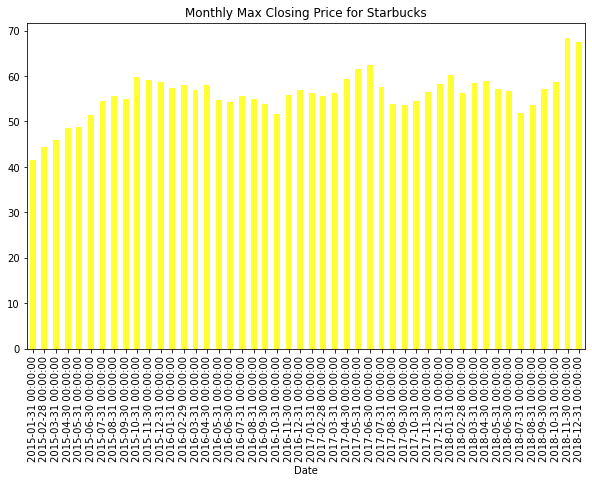

In [133]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(10,6), title=title,color='#ffff33');

That is it! Up next we'll learn about time shifts!

# Time Shifting

Sometimes you may need to shift all your data up or down along the time series index. In fact, a lot of pandas built-in methods do this under the hood. This isn't something we'll do often in the course, but it's definitely good to know about this anyways!

In [138]:
import pandas as pd

In [139]:
df = pd.read_csv('Course Data/starbucks.csv',index_col='Date',parse_dates=True)

In [140]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


## .shift() forward
This method shifts the entire date index a given number of rows, without regard for time periods (months & years).<br>It returns a modified copy of the original DataFrame.

In [142]:
## shift(1) means that it will shift the first row forward
## now the 1t row is shifted thats why we get NaN in 1st row 
df.shift(1).head()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0


In [141]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [145]:
## NOTE: You will lose that last piece of data that no longer has an index!
## lost the data of last row
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


## .shift() backwards

In [146]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [148]:
## shifted the data of 2nd row to the 1st row
df.shift(-1).head()

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0


In [151]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [153]:
## now the last row will be NaN
df.shift(-1).tail()

,Close,Volume
Date,,
2018-12-24,63.08,16646238.0
2018-12-26,63.20,11308081.0
2018-12-27,63.39,7712127.0
2018-12-28,64.40,7690183.0
2018-12-31,NaN,NaN


## Shifting based on Time Series Frequency Code

We can choose to shift <em>index values</em> up or down without realigning the data by passing in a <strong>freq</strong> argument.<br>
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end. <br>Refer to the <em>Time Series Offset Aliases</em> table from the Time Resampling lecture for a full list of values, or click <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.<br>

In [155]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [156]:
## Shift everything forward one month
df.shift(periods=1, freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [157]:
import pandas as pd
%matplotlib inline

In [160]:
## Import the data
## parse_date
df = pd.read_csv('Course Data/starbucks.csv', index_col='Date', parse_dates=True)

In [161]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<AxesSubplot:xlabel='Date'>

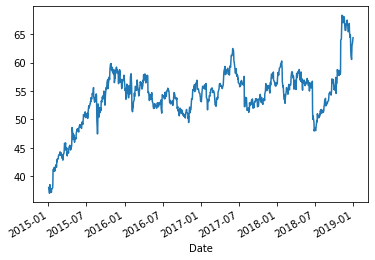

In [162]:
df['Close'].plot()

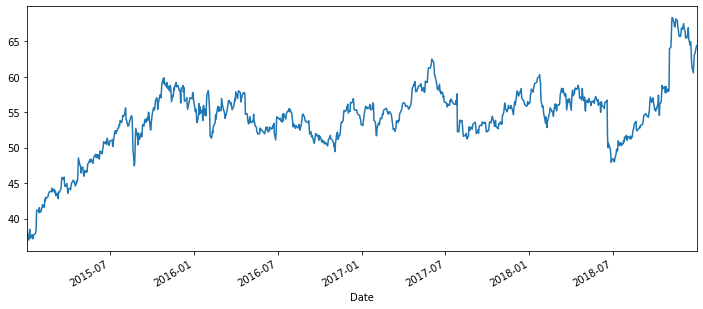

In [163]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [165]:
## 7 day rolling mean
## here window means the rows
df.rolling(window=7).mean().head(15)
## avg value of the closing price for last 7 DAYS
## avg value of the volume for last 7 DAYS

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


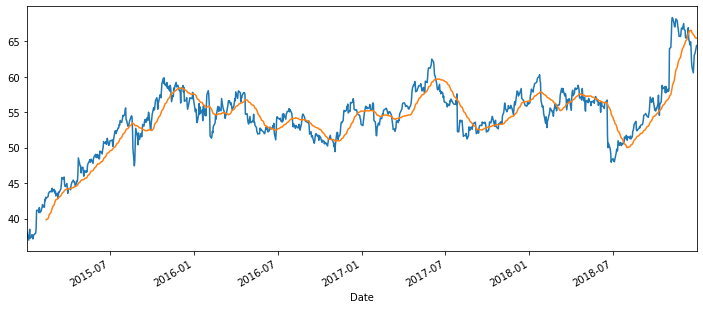

In [166]:
## 30 Day rolling mean
## avg price of last 30 days
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot();

The easiest way to add a legend is to make the rolling value a new column, then pandas does it automatically!

In [168]:
## adding a new column to dataframe
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [172]:
## 1st 29 rows will be empty due to window=30
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


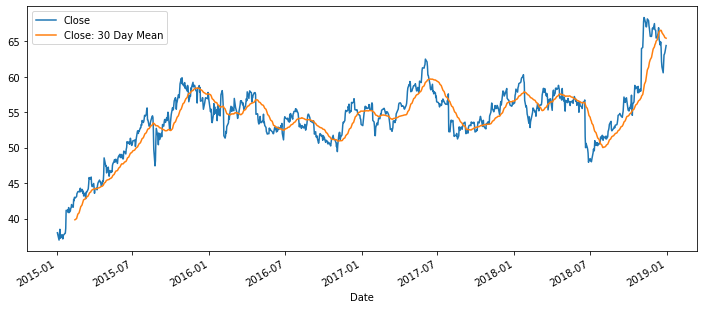

In [173]:
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5));

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

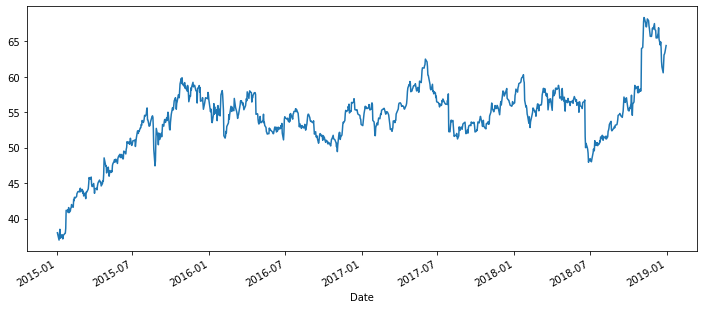

In [180]:
df['Close'].plot(figsize=(12,5));

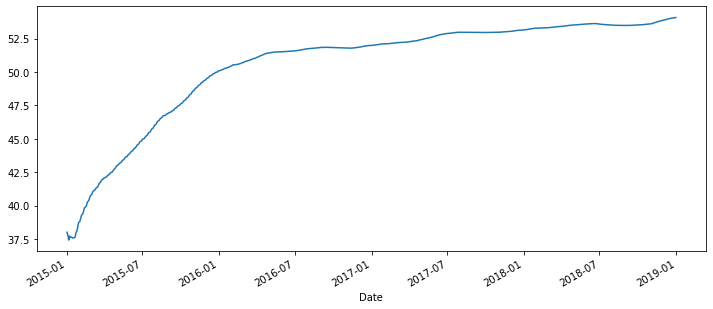

In [184]:
## avg value of the everything that came before it
df['Close'].expanding().mean().plot(figsize=(12,5));

That's it! It doesn't help much to visualize an expanding operation against the daily data, since all it really gives us is a picture of the "stability" or "volatility" of a stock. However, if you do want to see it, simply uncomment the first plot line above and rerun the cell.

Next up, we'll take a deep dive into visualizing time series data!

# Visualizing Time Series Data

Let's go through a few key points of creating nice time series visualizations!

In [188]:
import pandas as pd
%matplotlib inline

In [189]:
df = pd.read_csv('Course Data/starbucks.csv',index_col='Date',parse_dates=True)

In [190]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [191]:
## To show that dates are already parsed
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

First we'll create a line plot that puts both <tt>'Close'</tt> and <tt>'Volume'</tt> on the same graph.<br>Remember that we can use <tt>df.plot()</tt> in place of <tt>df.plot.line()</tt>

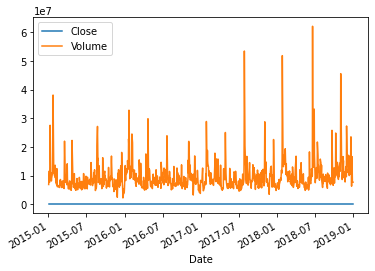

In [192]:
df.plot();

This isn't very helpful due to the difference in y-values, so we'll split them up.

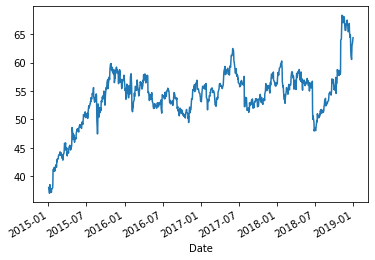

In [193]:
df['Close'].plot();

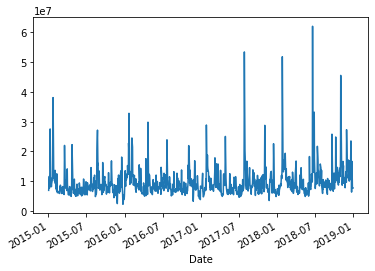

In [195]:
df['Volume'].plot();

# Plot Formatting

## Adding a title and axis labels

<div class="alert alert-info"><strong>NOTE:</strong> While we <em>can</em> pass a title into the pandas <tt>.plot()</tt> function, we can't pass x- and y-axis labels.<br>However, since <tt>.plot()</tt> returns a <tt>matplotlib.axes.AxesSubplot</tt> object, we can set the labels<br>on that object so long as we do it in the same jupyter cell. Setting an <tt>autoscale</tt> is done the same way.</div>

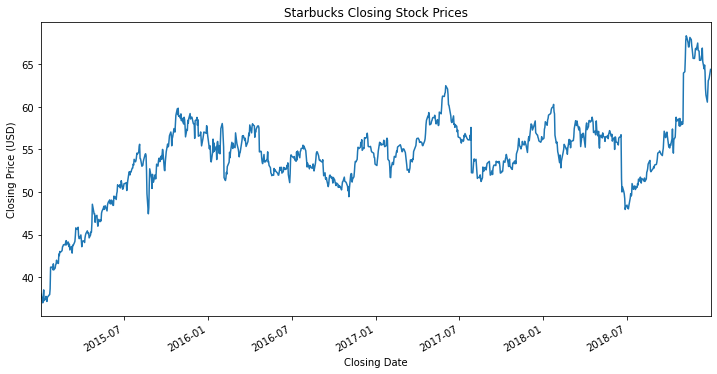

In [198]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## X Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

### Choosing X Limits by Slice:

In [203]:
## slicing
df['Close']['2017-01-01':'2017-03-01']

Date
2017-01-03    53.1100
2017-01-04    53.7241
2017-01-05    54.1750
2017-01-06    54.8179
2017-01-09    55.8446
2017-01-10    55.5376
2017-01-11    55.7487
2017-01-12    55.6815
2017-01-13    55.5088
2017-01-17    55.6527
2017-01-18    56.0845
2017-01-19    55.5472
2017-01-20    55.3265
2017-01-23    55.4224
2017-01-24    56.0749
2017-01-25    56.3244
2017-01-26    56.0941
2017-01-27    53.8488
2017-01-30    53.6377
2017-01-31    52.9852
2017-02-01    51.7186
2017-02-02    51.6899
2017-02-03    52.8317
2017-02-06    53.4746
2017-02-07    53.2433
2017-02-08    53.2240
2017-02-09    53.7927
2017-02-10    54.1878
2017-02-13    54.0818
2017-02-14    54.5348
2017-02-15    54.8047
2017-02-16    54.6794
2017-02-17    55.2770
2017-02-21    55.4601
2017-02-22    55.4890
2017-02-23    55.5565
2017-02-24    55.4023
2017-02-27    54.7276
2017-02-28    54.8143
2017-03-01    55.0746
Name: Close, dtype: float64

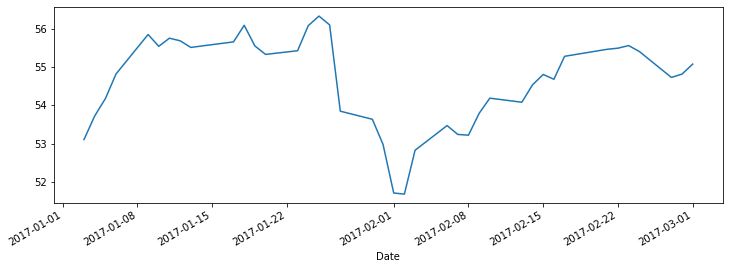

In [204]:
## Dates are separated by a colon:
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4));

### Choosing X Limits by Argument:

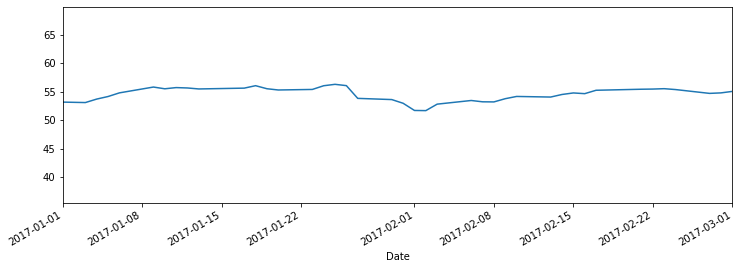

In [206]:
## Dates are separated by a comma:
## plots looks different to each other b/c the y-axis has be changed
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01']);

<div class="alert alert-info"><strong>NOTE:</strong> It's worth noting that the limit values do <em>not</em> have to appear in the index. Pandas will plot the actual dates based on their location in time.<br><br>Also, another advantage of slicing over arguments is that it's easier to include the upper/lower bound as a limit.<br>That is, <tt><font color=black>df['column']['2017-01-01':].plot()</font></tt> is easier to type than <tt><font color=black>df['column'].plot(xlim=('2017-01-01',df.index.max()))</font></tt></div>

Now let's focus on the y-axis limits to get a better sense of the shape of the data.<br>First we'll find out what upper and lower limits to use.

In [207]:
## FIND THE MINIMUM VALUE IN THE RANGE
df.loc['2017-01-01':'2017-03-01']['Close'].min()

51.6899

In [208]:
## FIND THE MAXIMUM VALUE IN THE RANGE
df.loc['2017-01-01':'2017-03-01']['Close'].max()

56.3244

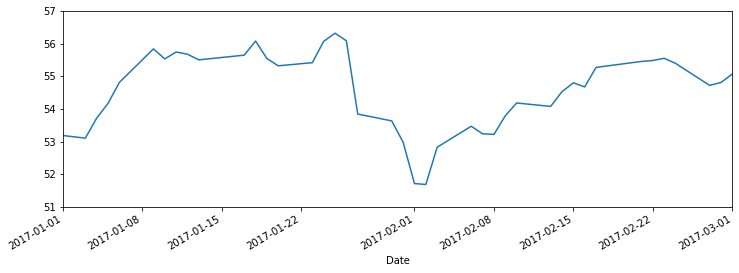

In [210]:
## now the graph looks same b/c we set Y-limit
## PLUG THESE IN AS Y-LIMIT VALUES
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[51,57]);

<div class="alert alert-info"><strong>NOTE:</strong> Be careful when setting y-axis limits! Setting too narrow a slice can make graphs appear overly volatile. The above chart might lead you to believe that stocks were many times more valuable in January 2017 than in early February, but a look at them with the y-axis minimum set to zero tells a different story:</div>

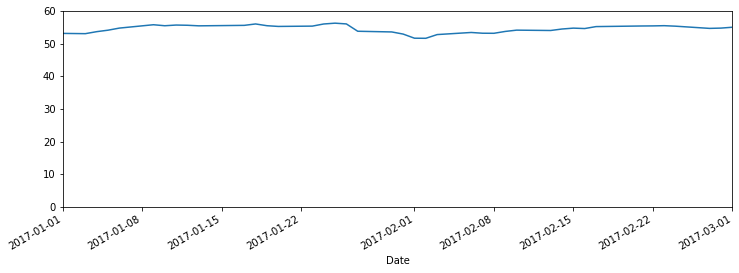

In [211]:
## changing y-limit
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[0,60]);

## Title and axis labels
Let's add a title and axis labels to our subplot.
<div class="alert alert-info"><strong>REMEMBER:</strong> <tt><font color=black>ax.autoscale(axis='both',tight=True)</font></tt> is unnecessary if axis limits have been passed into <tt>.plot()</tt>.<br>
If we were to add it, autoscale would revert the axis limits to the full dataset.</div>

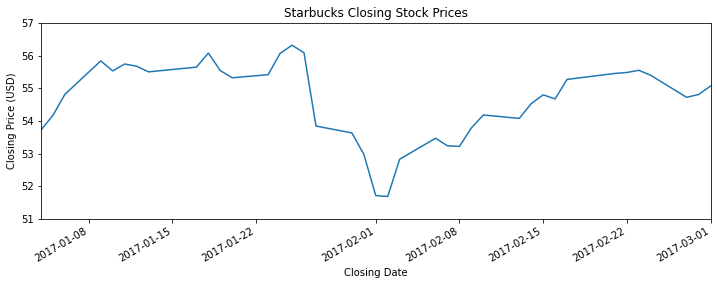

In [212]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(xlim=['2017-01-04','2017-03-01'],ylim=[51,57],figsize=(12,4),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Color and Style
We can pass arguments into <tt>.plot()</tt> to change the linestyle and color. Refer to the Customizing Plots lecture from the previous section for more options.

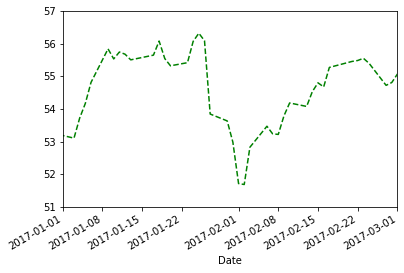

In [216]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='g');

## X Ticks
In this section we'll look at how to change the format and appearance of dates along the x-axis. To do this, we'll borrow a tool from <tt>matplotlib</tt> called <tt>dates</tt>.

In [217]:
from matplotlib import dates

### Set the spacing
The x-axis values can be divided into major and minor axes. For now, we'll work only with the major axis and learn how to set the spacing with <tt>.set_major_locator()</tt>.

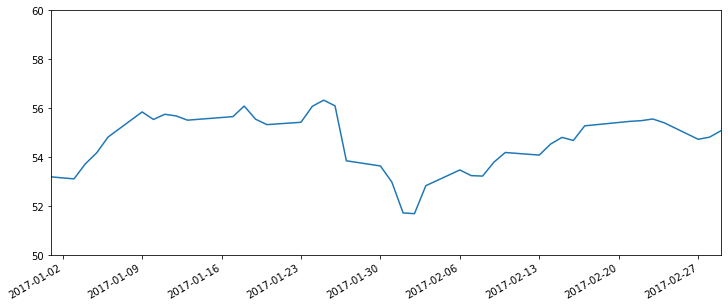

In [243]:
## CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60], figsize= (12,5))
## setting x label to empty string
## REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')
## SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
## weekly data locator
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

Notice that dates are spaced one week apart. The dates themselves correspond with <tt>byweekday=0</tt>, or Mondays.<br>
For a full list of locator options available from <tt>matplotlib.dates</tt> visit <a href='https://matplotlib.org/api/dates_api.html#date-tickers'>https://matplotlib.org/api/dates_api.html#date-tickers</a>

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [244]:
## USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS
from datetime import datetime

In [246]:
## by formating
datetime(2022, 5, 22, 21, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Sunday, May 22, 2022  09:05:06 PM'

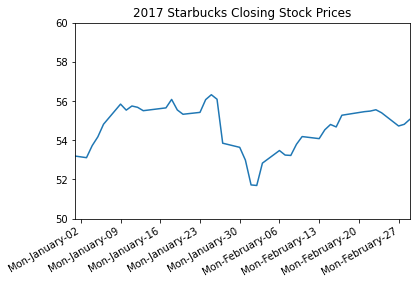

In [248]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')
## locator by formatting (Mon-Jan-02 etc)
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

## Major vs. Minor Axis Values
All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the <em>minor axis</em>, perhaps to separate month names from days of the month.

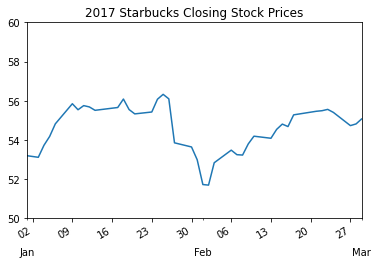

In [254]:
## for minor axis 
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,60],title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')
## Displaying dates in major axis and month name is minor axis
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

## Adding Gridlines
We can add x and y axis gridlines that extend into the plot from each major tick mark.

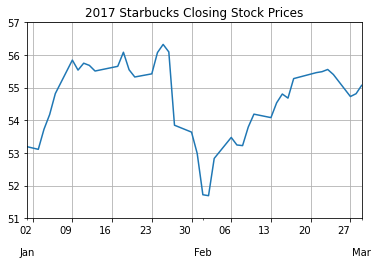

In [255]:
## rot=0 means rotation is equal to 0 ... (see the dates in plot)
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Pandas Time Series Exercise Set #1

For this set of exercises we'll use a dataset containing monthly milk production values in pounds per cow from January 1962 to December 1975.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [271]:
# RUN THIS CELL
import pandas as pd
%matplotlib inline

df = pd.read_csv('Course Data/monthly_milk_production.csv', encoding='utf8')
title = "Monthly milk production: pounds per cow. Jan '62 - Dec '75"

print(len(df))
print(df.head())

168
      Date  Production
0  1962-01         589
1  1962-02         561
2  1962-03         640
3  1962-04         656
4  1962-05         727


So <tt>df</tt> has 168 records and 2 columns.

### 1. What is the current data type of the Date column?
HINT: We show how to list column dtypes in the first set of DataFrame lectures.

In [273]:
df.dtypes

Date          object
Production     int64
dtype: object

### 2. Change the Date column to a datetime format

In [274]:
df['Date']

0      1962-01
1      1962-02
2      1962-03
3      1962-04
4      1962-05
        ...   
163    1975-08
164    1975-09
165    1975-10
166    1975-11
167    1975-12
Name: Date, Length: 168, dtype: object

In [277]:
df['Date']= pd.to_datetime(df['Date'])

In [278]:
df.dtypes

Date          datetime64[ns]
Production             int64
dtype: object

### 3. Set the Date column to be the new index

In [279]:
df.set_index('Date', inplace= True) 

In [280]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


### 4. Plot the DataFrame with a simple line plot. What do you notice about the plot?

<AxesSubplot:xlabel='Date'>

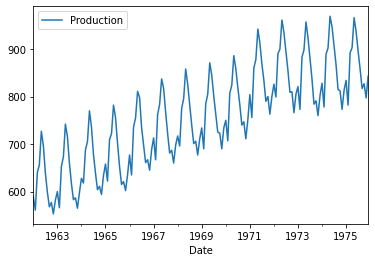

In [282]:
df.plot()

### 5. Add a column called 'Month' that takes the month value from the index
HINT: You have to call <tt>df.index</tt> as <tt>df['Date']</tt> won't work.

<strong>BONUS: See if you can obtain the <em>name</em> of the month instead of a number!</strong>

In [285]:
df['Months']= df.index.month
df.head()

,Production,Months
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


In [286]:
df['Months']= df.index.strftime('%B')
df.head()

,Production,Months
Date,,
1962-01-01,589,January
1962-02-01,561,February
1962-03-01,640,March
1962-04-01,656,April
1962-05-01,727,May


### 6. Create a BoxPlot that groups by the Month field

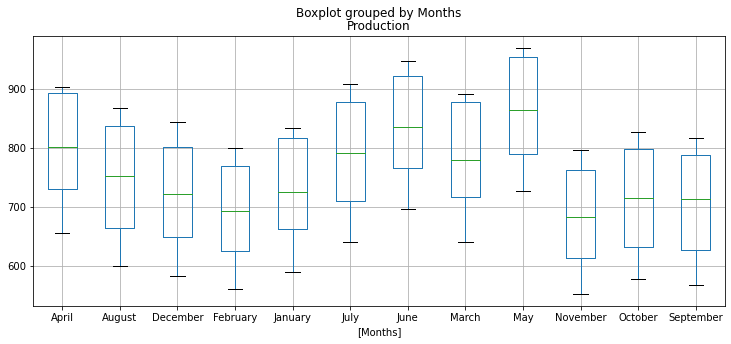

In [292]:
df.boxplot(by= 'Months', figsize= (12,5));

# Time Series with Pandas Project Exercise

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Import any necessary libraries.**

In [325]:
import pandas as pd

In [326]:
import numpy as np

In [327]:
%matplotlib inline

**Read in the data UMTMVS.csv file from the Data folder**

In [328]:
df= pd.read_csv('Course Data/UMTMVS.csv')

**Check the head of the data**

In [329]:
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


**Set the DATE column as the index.**

In [330]:
df.set_index('DATE', inplace= True) 

In [331]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


**Check the data type of the index.**

In [333]:
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

In [335]:
df.index= pd.to_datetime(df.index)

In [336]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Plot out the data, choose a reasonable figure size**

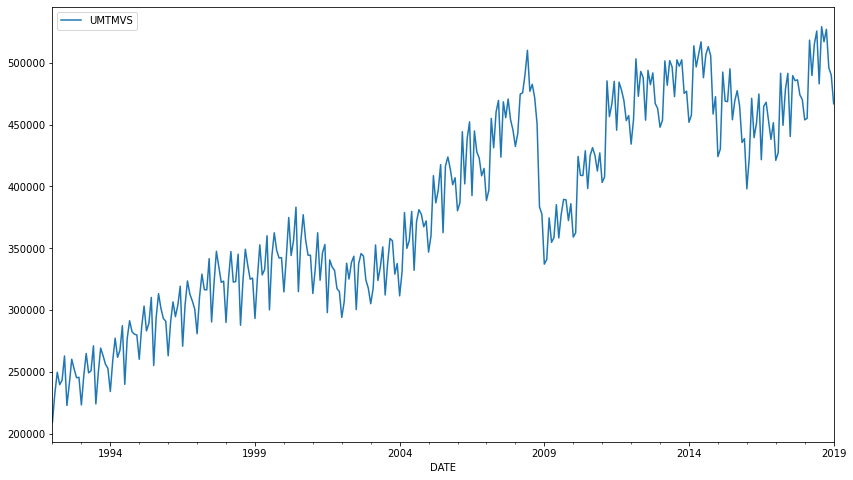

In [340]:
df.plot(figsize= (14,8));

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [343]:
a= df.loc['2009-01-01']

In [344]:
b= df.loc['2019-01-01']

In [346]:
c= 100* (b-a)/a

In [347]:
c

UMTMVS    38.472149
dtype: float64

**What was the percent decrease from Jan 2008 to Jan 2009?**

In [363]:
z= 100 * (df.loc['2009-01-01'] - df.loc['2008-01-01'])/df.loc['2008-01-01']

In [364]:
z

UMTMVS   -22.022775
dtype: float64

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [367]:
df.loc['2005-01-01':]

,UMTMVS
DATE,
2005-01-01,346845.0
2005-02-01,360009.0
2005-03-01,408699.0
2005-04-01,386657.0
2005-05-01,396886.0
...,...
2018-09-01,516992.0
2018-10-01,527031.0
2018-11-01,495901.0


In [368]:
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

**What 6 months have the highest value?**

In [369]:
df.sort_values(by= 'UMTMVS', ascending= False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [370]:
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

**Create a bar plot showing the average value in millions of dollars per year**

In [372]:
w= df.resample('Y').mean()

<AxesSubplot:xlabel='DATE'>

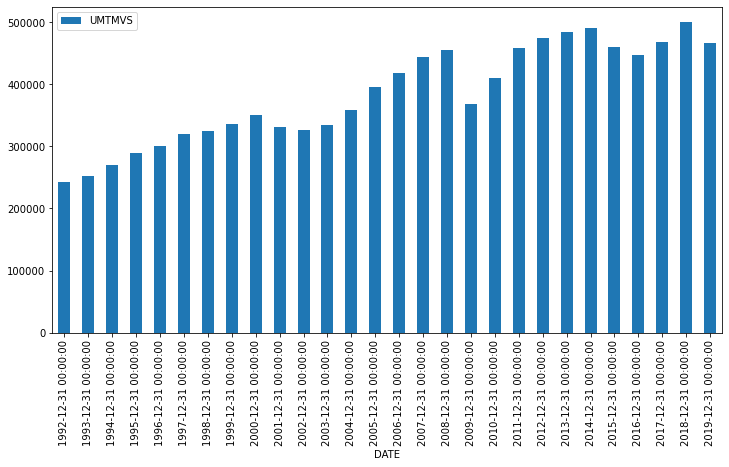

In [373]:
w.plot.bar(figsize= (12,6))

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [383]:
yearly_data= df.resample('Y').mean()

In [384]:
yearly_data.head()

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


In [392]:
yearly_data_shift= yearly_data.shift(1)

In [393]:
yearly_data_shift.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,242002.000000
1994-12-31,251708.083333
1995-12-31,269842.666667
1996-12-31,289973.083333


In [394]:
change= yearly_data - yearly_data_shift

In [396]:
change.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,9706.083333
1994-12-31,18134.583333
1995-12-31,20130.416667
1996-12-31,9792.583333


In [397]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

In [400]:
df['yearly_mean'] = df ['UMTMVS']. rolling(window = 12).mean()

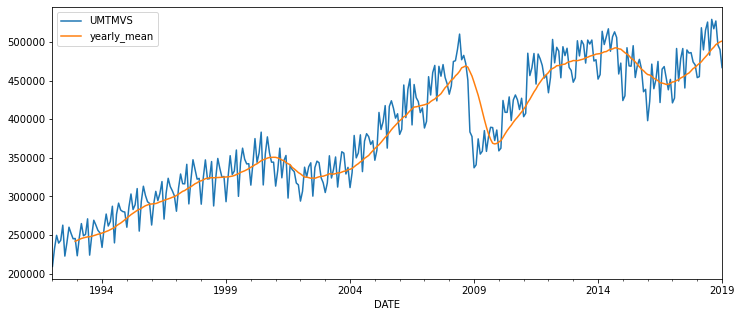

In [402]:
df.plot(figsize= (12,5));

**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [404]:
df= pd.read_csv('Course Data/UMTMVS.csv', index_col= 'DATE', parse_dates= True)

In [405]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [406]:
df2008 = df.loc['2008-01-01': '2009-01-01']

In [409]:
df2008.head()

,UMTMVS
DATE,
2008-01-01,432307.0
2008-02-01,442996.0
2008-03-01,474592.0
2008-04-01,475667.0
2008-05-01,490500.0


In [412]:
df2008.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [410]:
df2008.max()

UMTMVS    510081.0
dtype: float64

In [413]:
df_post_peak= df.loc['2008-06-01']

In [415]:
df_post_peak[df_post_peak >= 510081.0].dropna()

UMTMVS    510081.0
Name: 2008-06-01 00:00:00, dtype: float64

In [416]:
len(df.loc['2008-06-01':'2014-03-01'])

70